In [2]:
import raphtory as rp
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%pip install distinctipy
import distinctipy
from plotting_utils import *

In [3]:
file = "/Users/naomiarnold/CODE/Raphtory/raphtory-research/stackexchange/sx-mathoverflow.txt"
sx_df = pd.read_csv(file, names = ["src", "dst", "time"],sep=" ")
display(sx_df)

,src,dst,time
0,1,4,1254192988
1,3,4,1254194656
2,1,2,1254202612
3,25,1,1254232804
4,14,16,1254263166
...,...,...,...
506545,21349,88580,1457260401
506546,20031,1114,1457261526
506547,51428,1114,1457261724
506548,56259,56259,1457261848


In [48]:
g = rp.Graph()
for row in sx_df.itertuples():
    g.add_vertex(row[3],row[1])
    g.add_vertex(row[3],row[2])
    if row[2]!=row[1]:
        g.add_edge(row[3],row[1],row[2])

In [5]:
views_daily = g.rolling(window=86400)
views_weekly = g.rolling(window=604800,step=86400)
views_monthly = g.rolling(window="30 days",step="1 day")

In [6]:
print(g.latest_time())

1457262355


In [18]:
timestamps = []
ec =[]
for i, view in enumerate(views_weekly):
    time = view.latest_time()
    timestamps.append(dt.datetime.fromtimestamp(time))
    ec.append(view.num_vertices())  

<AxesSubplot:xlabel='Time', ylabel='Number of active users'>

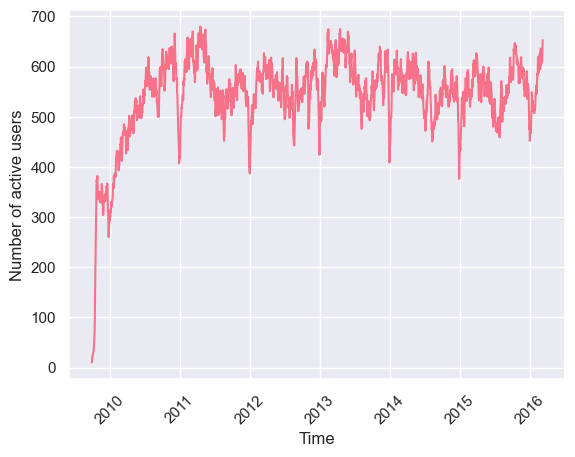

In [19]:
sns.set_context()
ax = plt.gca()
plt.xticks(rotation=45)
ax.set_xlabel("Time")
ax.set_ylabel("Number of active users")
sns.lineplot(x = timestamps, y = ec,ax=ax)

In [9]:
degrees = sorted([(v.id(), v.in_degree()) for v in g.vertices()], key = lambda x: x[1], reverse=True)

In [10]:
print(degrees[-10:])

[(87893, 0), (88011, 0), (45985, 0), (48994, 0), (87860, 0), (88126, 0), (39572, 0), (88172, 0), (76463, 0), (88531, 0)]


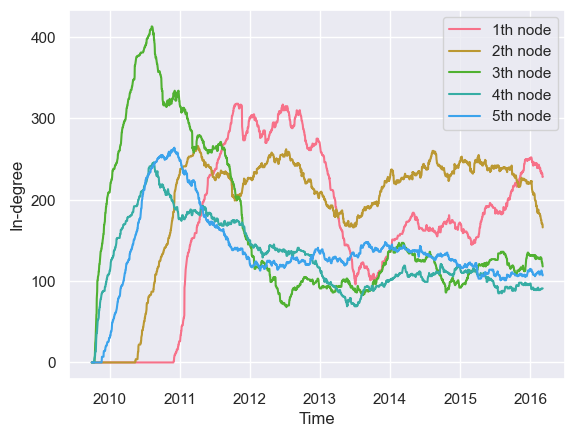

In [26]:
sns.set()
sns.set_palette("husl")

n = 5
leaders = [x[0] for x in degrees[:n]]
timestamps = [dt.datetime.fromtimestamp(v.latest_time()) for v in g.rolling(window=2592000,step=86400)]

fig, ax = plt.subplots()

for i,leader in enumerate(leaders):
    deg = list(map( lambda v: v.in_degree(), g.vertex(leader).rolling(window=25920000,step=86400)))
    ax.plot(timestamps,deg,label=str(i+1)+"th node")

ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("In-degree")
plt.show()

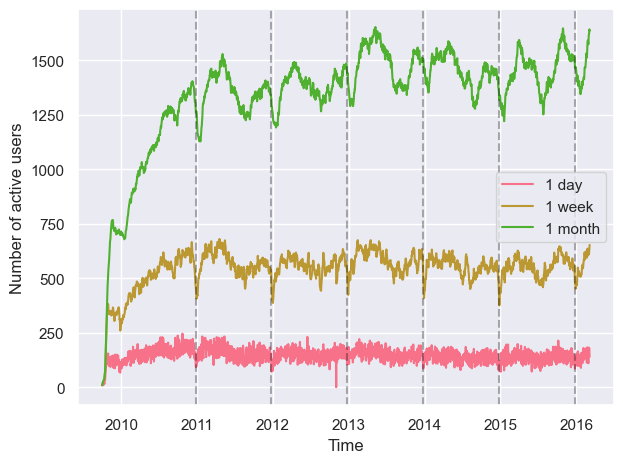

In [25]:
window_sizes = [86400,604800,2592000,31536000]
window_names = ["1 day", "1 week", "1 month", "1 year"]

fig, ax = plt.subplots()

for i in range(3):
    views = g.rolling(window=window_sizes[i], step=86400)
    timestamps = []
    vertices = []
    for view in views:
        timestamps.append(dt.datetime.fromtimestamp(view.latest_time()))
        vertices.append(view.num_vertices())
    ax.plot(timestamps,vertices,label=window_names[i])

for i in range(6):
    ax.axvline(dt.datetime(2010+i,12,25),color="black",linestyle="--", alpha=0.3)

ax.set_xlabel("Time")
ax.set_ylabel("Number of active users")

ax.legend()
plt.tight_layout()
plt.show()

In [66]:
from raphtory.algorithms import all_motifs_count

counts = all_motifs_count(g,3600)

In [50]:
print(counts[6355])

[5, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 12, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 36, 36, 12, 0, 1, 16, 3]


In [67]:
df = pd.DataFrame(counts).transpose()

In [52]:
print(g.num_vertices())

24818


In [53]:
# display(df)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
12940,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,2,0
56498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48586,0,0,0,0,0,0,0,0,0,0,...,0,1,2,13,13,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7269,2,0,2,0,0,0,1,0,1,2,...,0,0,130,32,127,104,102,100,31,96
18822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40046,3,0,0,0,0,0,0,0,0,0,...,0,0,2,4,4,0,0,0,2,0


In [65]:
print(rp.algorithms.local_triangle_count(g,12940))

9
Edges(Edge(source=290, target=12940, earliest_time=1300516165, latest_time=1300516165), Edge(source=1149, target=12940, earliest_time=1300538744, latest_time=1300538744), Edge(source=1437, target=12940, earliest_time=1300519179, latest_time=1300519179), Edge(source=6976, target=12940, earliest_time=1300525737, latest_time=1300525737), Edge(source=7666, target=12940, earliest_time=1300581906, latest_time=1300581906), Edge(source=12940, target=7666, earliest_time=1300597288, latest_time=1300597391), Edge(source=12940, target=7666, earliest_time=1300597288, latest_time=1300597391), Edge(source=11771, target=12940, earliest_time=1300588535, latest_time=1300588535), Edge(source=13302, target=12940, earliest_time=1301412397, latest_time=1301412397), Edge(source=12940, target=13302, earliest_time=1301527891, latest_time=1301527891))


In [68]:
motifs = np.array(df.sum(axis=0))
motifs[31:] = motifs[31:]/3

In [69]:
motifs_3d = to_3d_heatmap(motifs)

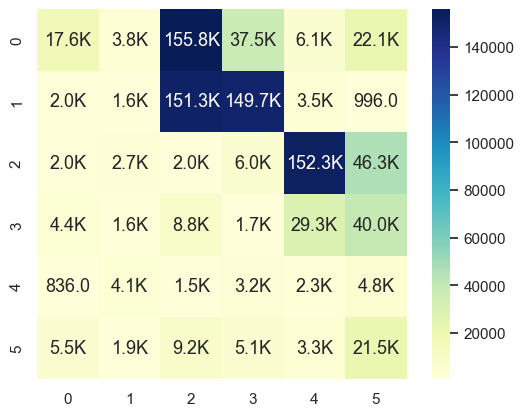

In [70]:
fig, ax = plt.subplots()

labels = get_labels(motifs_3d)
ax = sns.heatmap(motifs_3d,square=True,  cmap="YlGnBu", cbar=True, cbar_kws={"shrink": 1.0}, annot=labels, annot_kws={"size":13}, fmt='')